### ЛР4 Голубев Сергей ИУ5-65Б

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [2]:
# чтение обучающей выборки
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

<AxesSubplot:>

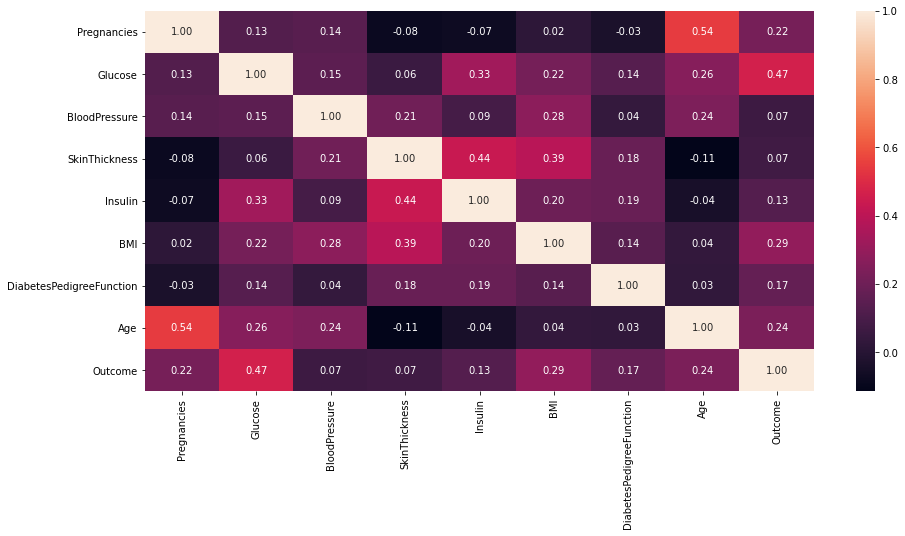

In [4]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [5]:
X = data.drop(["Pregnancies"], axis = 1)
Y = data.Age
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Выходные данные:

 0    50
1    31
2    32
3    21
4    33
Name: Age, dtype: int64


In [6]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
499      154             74             32      193  29.3   
720       83             86             19        0  29.3   
556       97             70             40        0  38.1   
583      100             76              0        0  38.7   
150      136             74             50      204  37.4   

     DiabetesPedigreeFunction  Age  Outcome  
499                     0.839   39        0  
720                     0.317   34        0  
556                     0.218   30        0  
583                     0.190   42        0  
150                     0.399   24        0   

Входные параметры тестовой выборки:

      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661      199             76             43        0  42.9   
122      107             74             30      100  33.6   
113       76             62              0        0  34.0   
14       166             72       

### Построение линейной регрессии

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [8]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

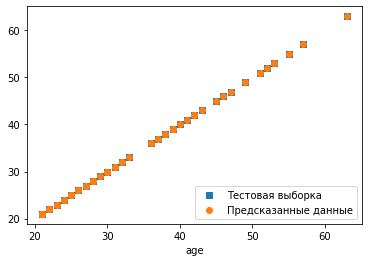

In [9]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('age')
plt.show()

### SVM

In [10]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt

In [11]:
svc = SVC(kernel='linear')
svc.fit(X_train,Y_train)
lr_y_pred = svc.predict(X_test)

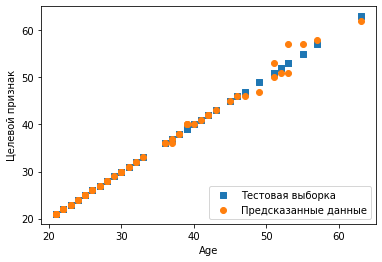

In [12]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Age')
plt.ylabel ('Целевой признак')
plt.show()

### Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [14]:
# Обучим дерево на всех признаках iris
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
lr_y_pred = clf.predict(X_test)

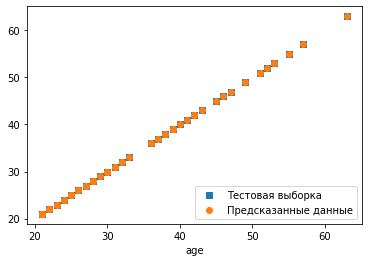

In [15]:
plt.scatter(X_test.Age, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('age')
plt.show()